In [1]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPClassifier
from sklearn import metrics
import random

In [2]:
# Get list of training and test images
print("Loading data for training")
from pathlib import Path
img_folder = Path('COLLECT_DATA_COMBINED')  
test_folder = img_folder/'test'
train_folder = img_folder/'train'
test_images = list(test_folder.glob('**/*.jpg'))
train_images = list(train_folder.glob('**/*.jpg'))
print("Number of training image:", len(train_images))
print("Number of testing image:", len(test_images))

Loading data for training
Number of training image: 21016
Number of testing image: 1984


# Prepair data for training (if using batch training please skip this step)

In [ ]:
random.shuffle(train_images)
num_images = len(train_images)
X_train = np.empty((0,784), dtype=float)
Y_train = np.empty(num_images, dtype=np.uint8) 
for i in range(num_images):
    image_path = str(train_images[i])
    # print(image_path)
    img = cv.imread(str(image_path), cv.IMREAD_GRAYSCALE)
    # Normalize to range [0,1]
    img = img.astype(float)
    cv.normalize(img,img,0, 1.0, cv.NORM_MINMAX)
    # reshape to row vector
    img = np.reshape(img,(1,784))
    X_train = np.vstack((X_train,img))
    # create Target vector
    if train_images[i].parent.name == 'A':
        Y_train[i] = 0
    elif train_images[i].parent.name == 'B':
        Y_train[i] = 1
    elif train_images[i].parent.name == 'C':
        Y_train[i] = 2
    elif train_images[i].parent.name == 'D':
        Y_train[i] = 3
    elif train_images[i].parent.name == 'E':
        Y_train[i] = 4
    elif train_images[i].parent.name == 'F':
        Y_train[i] = 5
    elif train_images[i].parent.name == 'G':
        Y_train[i] = 6
    elif train_images[i].parent.name == 'H':
        Y_train[i] = 7
    elif train_images[i].parent.name == 'I':
        Y_train[i] = 8
    elif train_images[i].parent.name == 'K':
        Y_train[i] = 9
    print("==================================================")
    print("X_train:", len(X_train), "Y_train:", len(Y_train))

# Prepair data for testing

In [3]:
random.shuffle(test_images)
num_images = len(test_images)
X_test = np.empty((0,784), dtype=float)
Y_test = np.empty(num_images, dtype=np.uint8) 
for i in range(num_images):
    image_path = str(test_images[i])
    # print(image_path)
    img = cv.imread(str(image_path), cv.IMREAD_GRAYSCALE)
    # Normalize to range [0,1]
    img = img.astype(float)
    cv.normalize(img,img,0, 1.0, cv.NORM_MINMAX)
    # reshape to row vector
    img = np.reshape(img,(1,784))
    X_test = np.vstack((X_test,img))
    
    # create Target vector
    if test_images[i].parent.name == 'A':
        Y_test[i] = 0
    elif test_images[i].parent.name == 'B':
        Y_test[i] = 1
    elif test_images[i].parent.name == 'C':
        Y_test[i] = 2
    elif test_images[i].parent.name == 'D':
        Y_test[i] = 3
    elif test_images[i].parent.name == 'E':
        Y_test[i] = 4
    elif test_images[i].parent.name == 'F':
        Y_test[i] = 5
    elif test_images[i].parent.name == 'G':
        Y_test[i] = 6
    elif test_images[i].parent.name == 'H':
        Y_test[i] = 7
    elif test_images[i].parent.name == 'I':
        Y_test[i] = 8
    elif test_images[i].parent.name == 'K':
        Y_test[i] = 9
    print("=============================================")
    print("X_test:", len(X_test),"Y_test:", len(Y_test))


X_test: 1 Y_test: 1984
X_test: 2 Y_test: 1984
X_test: 3 Y_test: 1984
X_test: 4 Y_test: 1984
X_test: 5 Y_test: 1984
X_test: 6 Y_test: 1984
X_test: 7 Y_test: 1984
X_test: 8 Y_test: 1984
X_test: 9 Y_test: 1984
X_test: 10 Y_test: 1984
X_test: 11 Y_test: 1984
X_test: 12 Y_test: 1984
X_test: 13 Y_test: 1984
X_test: 14 Y_test: 1984
X_test: 15 Y_test: 1984
X_test: 16 Y_test: 1984
X_test: 17 Y_test: 1984
X_test: 18 Y_test: 1984
X_test: 19 Y_test: 1984
X_test: 20 Y_test: 1984
X_test: 21 Y_test: 1984
X_test: 22 Y_test: 1984
X_test: 23 Y_test: 1984
X_test: 24 Y_test: 1984
X_test: 25 Y_test: 1984
X_test: 26 Y_test: 1984
X_test: 27 Y_test: 1984
X_test: 28 Y_test: 1984
X_test: 29 Y_test: 1984
X_test: 30 Y_test: 1984
X_test: 31 Y_test: 1984
X_test: 32 Y_test: 1984
X_test: 33 Y_test: 1984
X_test: 34 Y_test: 1984
X_test: 35 Y_test: 1984
X_test: 36 Y_test: 1984
X_test: 37 Y_test: 1984
X_test: 38 Y_test: 1984
X_test: 39 Y_test: 1984
X_test: 40 Y_test: 1984
X_test: 41 Y_test: 1984
X_test: 42 Y_test: 1984
X

# Create and train model MLP for each batch

In [15]:
#create MLP
print("Create model MLP...")
mlp = MLPClassifier(hidden_layer_sizes=(15,20),activation='relu',max_iter=500,warm_start=True,verbose=False)
print("Prepairing training data...")
random.shuffle(train_images)
num_images = len(train_images)
print("number of images = ", num_images)
n_batches = 10
batch_size = int(num_images/n_batches)
print("batch size = ", batch_size)
for b in range(n_batches):
    print("Processing batch ", b+1)
    X_train = np.empty((0,784), dtype=np.float64)
    Y_train = np.empty(batch_size, dtype=np.uint8) 
    for i in np.arange(batch_size):
        # load image
        image_path = str(train_images[b*batch_size + i])
        img = cv.imread(image_path,cv.IMREAD_GRAYSCALE)
        # normalize 
        img = img.astype(np.float)
        cv.normalize(img, img, 0,1,cv.NORM_MINMAX)
        # reshape
        img = np.reshape(img,(1,784))
        # img = img.ravel()
        # stack images
        X_train = np.vstack((X_train,img))
        # create label
        if train_images[b*batch_size + i].parent.name == 'A':
            Y_train[i] = 0
        elif train_images[b*batch_size + i].parent.name == 'B':
            Y_train[i] = 1
        elif train_images[b*batch_size + i].parent.name == 'C':
            Y_train[i] = 2
        elif train_images[b*batch_size + i].parent.name == 'D':
            Y_train[i] = 3
        elif train_images[b*batch_size + i].parent.name == 'E':
            Y_train[i] = 4
        elif train_images[b*batch_size + i].parent.name == 'F':
            Y_train[i] = 5
        elif train_images[b*batch_size + i].parent.name == 'G':
            Y_train[i] = 6
        elif train_images[b*batch_size + i].parent.name == 'H':
            Y_train[i] = 7
        elif train_images[b*batch_size + i].parent.name == 'I':
            Y_train[i] = 8
        elif train_images[b*batch_size + i].parent.name == 'K':
            Y_train[i] = 9
        
    
  # Train MLP model
    print("Train MLP model with batch ", b+1)
  # method 1: use partial_fit, set warm_start = False
  # mlp.partial_fit(X,Y, classes=n_classes)
  # method 2: use fit, set warm_start = True
    mlp = mlp.fit(X_train,Y_train)
  # Evaluation
  # scores_train.append(mlp.score(X, Y))
  # scores_test.append(mlp.score(X_test, Y_test))
  # print('Train accuracy = ',scores_train[-1],'; Test accuracy = ',  scores_test[-1])
    y_pred = mlp.predict(X_test)
    accuracy = metrics.accuracy_score(Y_test, y_pred)
    print('==========================Batch ',b+1,' completed. Accuracy = ', accuracy,"=====================")


Create model MLP...
Prepairing training data...
number of images =  21016
batch size =  2101
Processing batch  1


C:\Users\trann\AppData\Local\Temp\ipykernel_12480\2054274624.py:20: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  img = img.astype(np.float)


Train MLP model with batch  1
==========================Batch  1  completed. Accuracy =  0.09727822580645161 =====================
Processing batch  2


C:\Users\trann\AppData\Local\Temp\ipykernel_12480\2054274624.py:20: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  img = img.astype(np.float)


Train MLP model with batch  2
==========================Batch  2  completed. Accuracy =  0.09979838709677419 =====================
Processing batch  3


C:\Users\trann\AppData\Local\Temp\ipykernel_12480\2054274624.py:20: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  img = img.astype(np.float)


Train MLP model with batch  3
==========================Batch  3  completed. Accuracy =  0.10483870967741936 =====================
Processing batch  4


C:\Users\trann\AppData\Local\Temp\ipykernel_12480\2054274624.py:20: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  img = img.astype(np.float)


Train MLP model with batch  4
==========================Batch  4  completed. Accuracy =  0.10735887096774194 =====================
Processing batch  5


C:\Users\trann\AppData\Local\Temp\ipykernel_12480\2054274624.py:20: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  img = img.astype(np.float)


Train MLP model with batch  5
==========================Batch  5  completed. Accuracy =  0.09979838709677419 =====================
Processing batch  6


C:\Users\trann\AppData\Local\Temp\ipykernel_12480\2054274624.py:20: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  img = img.astype(np.float)


Train MLP model with batch  6
==========================Batch  6  completed. Accuracy =  0.09324596774193548 =====================
Processing batch  7


C:\Users\trann\AppData\Local\Temp\ipykernel_12480\2054274624.py:20: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  img = img.astype(np.float)


Train MLP model with batch  7
==========================Batch  7  completed. Accuracy =  0.09727822580645161 =====================
Processing batch  8


C:\Users\trann\AppData\Local\Temp\ipykernel_12480\2054274624.py:20: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  img = img.astype(np.float)


Train MLP model with batch  8
==========================Batch  8  completed. Accuracy =  0.0871975806451613 =====================
Processing batch  9


C:\Users\trann\AppData\Local\Temp\ipykernel_12480\2054274624.py:20: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  img = img.astype(np.float)


Train MLP model with batch  9
==========================Batch  9  completed. Accuracy =  0.10786290322580645 =====================
Processing batch  10


C:\Users\trann\AppData\Local\Temp\ipykernel_12480\2054274624.py:20: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  img = img.astype(np.float)


Train MLP model with batch  10
==========================Batch  10  completed. Accuracy =  0.11290322580645161 =====================


# Confusion matrix 

c:\Users\trann\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


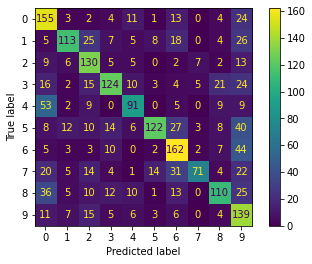

In [16]:
from sklearn import metrics
# print('Accuracy = ', metrics.accuracy_score(Y_test,y_pred))
metrics.plot_confusion_matrix(mlp, X_train,Y_train)
plt.show()

# Save model

In [17]:
import pickle
filename = 'nammoadidaphat_(15,20)_lan_2.sav'
pickle.dump(mlp, open(filename,'wb'))